# Prediction analysis

Dieses kleine Programm soll die vom Modell vorgenommenen Klassifikationen statistisch auswerten. Dies dient dazu, einen besseren Überblick über die erkannten Klassen, sowie die dazugehörigen Wahrscheinlichkeiten zu erhalten.  
Wichtig ist, dass diese statistische Auswertung nur darstellt, was das neuronale Netz meint gefunden zu haben. Die tatsächliche Anzahl an Klassen kann höher oder niedriger sein. Dies resultiert aus falsch positiven und falsch negativen Klassifikationen des Netzes, in denen es einen Gegenstand als einen anderen erkennt oder Gegenstände die es erkennen sollte nicht erkennt.  
Es lassen sich somit eher Tendenzen ablesen, welche Gegenstände das Netz besonders gut erkennen kann, oder welche Gegenstände vermutlich häufiger im Datensatz vorkommen können.

In [2]:
import matplotlib.pyplot as plt
import json, os

In [3]:
WORK_DIR = "/home/julius/PowerFolders/Masterarbeit/"
os.chdir(WORK_DIR)

DATA_PATH = "./detections/personData200/06,04,2021-10,46/"

In [5]:
with open(DATA_PATH + "detections.json", "r+") as input_file:
    evaluation = json.load(input_file)

Für das Sammeln der Daten wird die während der Klassifizierung erstellte '.json' Datei _detections.json_ eingelesen. Für jedes Bild werden die erkannten Klassen und die dazugehörigen Wahrscheinlichkeiten erfasst. Für die Wahrscheinlichkeiten werden dabei in die Werte für die maximale, minimale und durchschnittliche Wahrscheinlichkeit ermittelt. Sollte es keine erkannten Klassen geben, wird die Kategorie "no detections" angelegt oder hochgezählt.  
Auch die Anzahl der Scans ohne erkannte Klasse ist nicht genau. So fallen die Scans, auf denen Gegenstände außerhalb des Plakats erkannt werden nicht in diese Kategorie. Ebenso werden Scans, auf denen nur falsch positive Klassifizierungen auftauchen nicht beachtet.

In [6]:
label_statistics = {}
for image in evaluation:
    if len(evaluation[image]["category_names"]) == 0:
        if "no_detection" not in label_statistics:
            label_statistics["no_detection"] = {"num": 1, "mean_probability": 0.00, "max_probability": 0.00, "min_probability": 0.00}
        else:
            label_statistics["no_detection"]["num"] += 1
    for count, element in enumerate(evaluation[image]["category_names"]):
        if element not in label_statistics:
            label_statistics[element] = {"num": 1, "mean_probability": evaluation[image]["prediction_scores"][count], "max_probability": evaluation[image]["prediction_scores"][count], "min_probability": evaluation[image]["prediction_scores"][count]}
        else:
            label_statistics[element]["num"] += 1
            label_statistics[element]["mean_probability"] += evaluation[image]["prediction_scores"][count]
            if label_statistics[element]["max_probability"] < evaluation[image]["prediction_scores"][count]:
                label_statistics[element]["max_probability"] = evaluation[image]["prediction_scores"][count]
            if label_statistics[element]["min_probability"] > evaluation[image]["prediction_scores"][count]:
                label_statistics[element]["min_probability"] = evaluation[image]["prediction_scores"][count]
for label in label_statistics:
    if label != "no_detection":
        label_statistics[label]["mean_probability"] = label_statistics[label]["mean_probability"]/label_statistics[label]["num"]

Abschließend werden die Daten in vier Balkendiagrammen dargestellt. Sie zeigen die Anzahl, sowie die durschnittliche, minimale und maximale Wahrscheinlichkeit je Klasse. Die Daten sind wie oben beschrieben kritisch zu hinterfragen.  

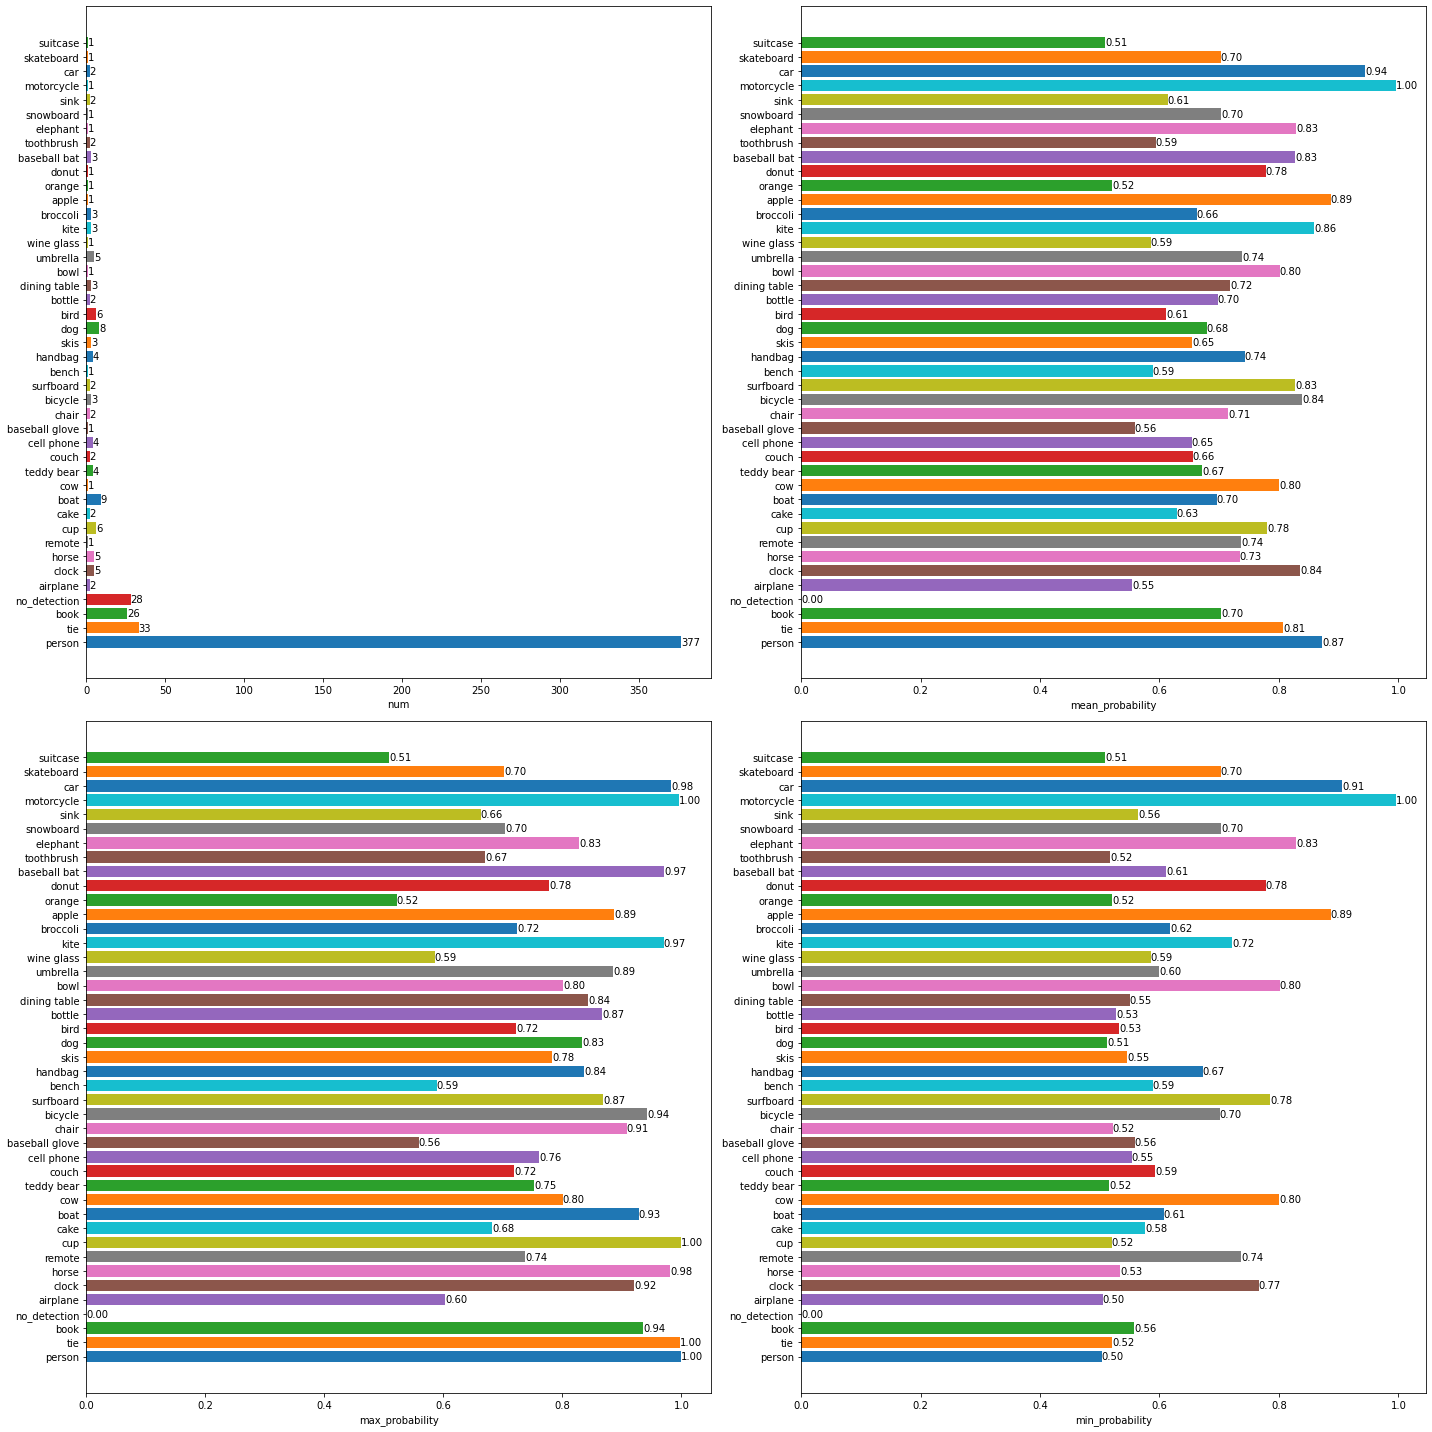

In [8]:

fig = plt.figure(figsize=(20, 20))
for count, category in enumerate(list(label_statistics[list(label_statistics.keys())[0]].keys())):
    ax = plt.subplot(2, 2, 1+count)
    for count_two, label in enumerate(label_statistics.keys()):
        hbar = ax.barh(count_two, label_statistics[label][category])
        ax.set_yticks(range(len(label_statistics.keys())))
        ax.set_yticklabels(label_statistics.keys())
        if count > 0:
            ax.bar_label(hbar, fmt="%.2f")
        else:
            ax.bar_label(hbar)
        ax.set_xlabel(category)
    plt.tight_layout()
    plt.savefig(path + "analysis.jpg")